<a href="https://colab.research.google.com/github/IdealisticINTJ/Stock_Price-Financial_Analysis_ARIMA/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 7.7MB/s 
     |████████████████████████████████| 9.5MB 38.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [4]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle3"

In [7]:
%cd /content/gdrive/My Drive/Kaggle3

/content/gdrive/My Drive/Kaggle3


In [8]:
!kaggle datasets download -d timoboz/tesla-stock-data-from-2010-to-2020

  0% 0.00/46.1k [00:00<?, ?B/s]
100% 46.1k/46.1k [00:00<00:00, 10.6MB/s]


In [9]:
!unzip \*.zip  && rm *.zip

Archive:  tesla-stock-data-from-2010-to-2020.zip
  inflating: TSLA.csv                


In [10]:
Data = pd.read_csv("TSLA.csv")

In [11]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [12]:
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
Data['Date'] = pd.to_datetime(Data['Date'])

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
Data.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
unique,2416,nan,nan,nan,nan,nan,nan
top,2016-11-14 00:00:00,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan
first,2010-06-29 00:00:00,nan,nan,nan,nan,nan,nan
last,2020-02-03 00:00:00,nan,nan,nan,nan,nan,nan
mean,NaN,186.27,189.58,182.92,186.40,186.40,5572721.69
std,NaN,118.74,120.89,116.86,119.14,119.14,4987809.15
min,NaN,16.14,16.63,14.98,15.80,15.80,118500.00
25%,NaN,34.34,34.90,33.59,34.40,34.40,1899275.00


In [16]:
Data.isnull().values.sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0627ba110>,
      dtype=object)

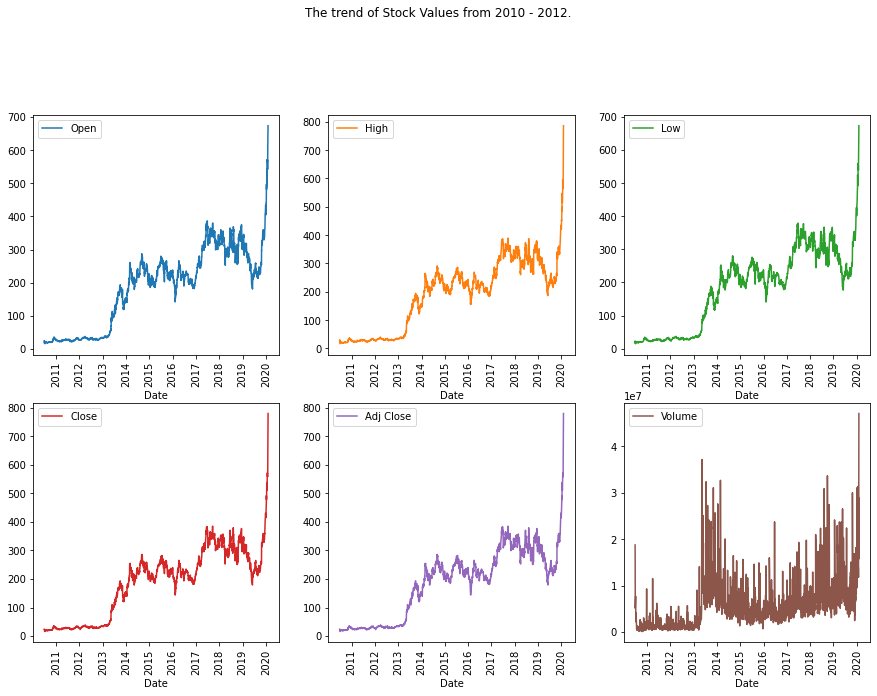

In [17]:
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# Plot
Data.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "The trend of Stock Values from 2010 - 2012.", rot = 90)

In [19]:
import seaborn as sns

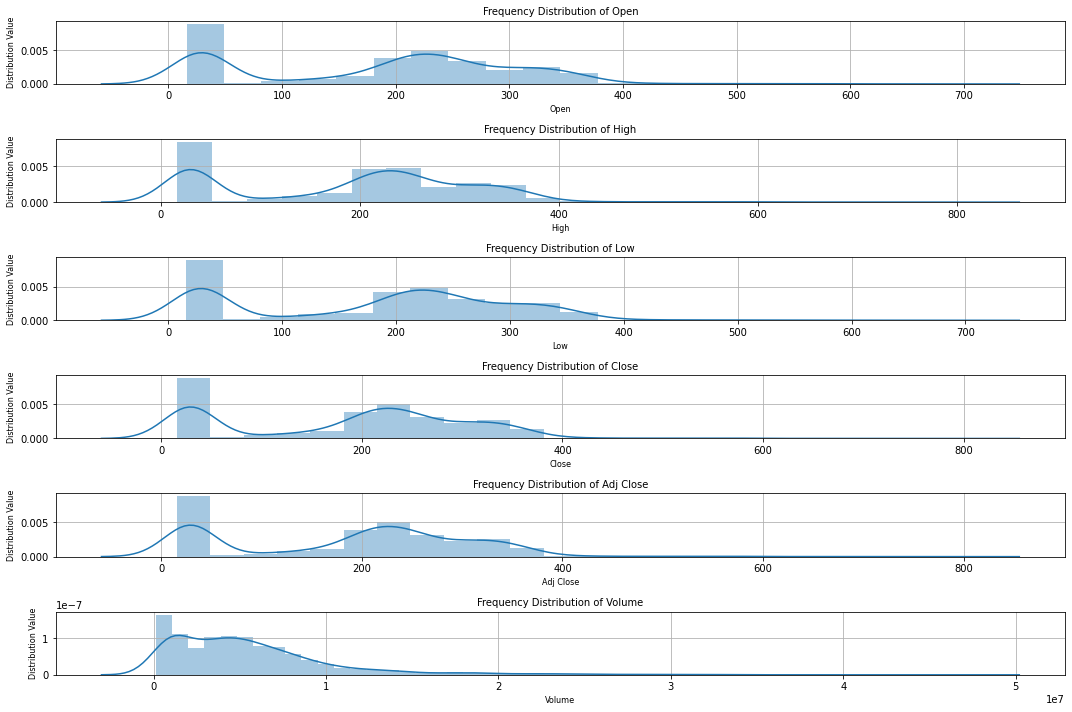

In [20]:
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(Data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) 
    ax[i].grid('on')

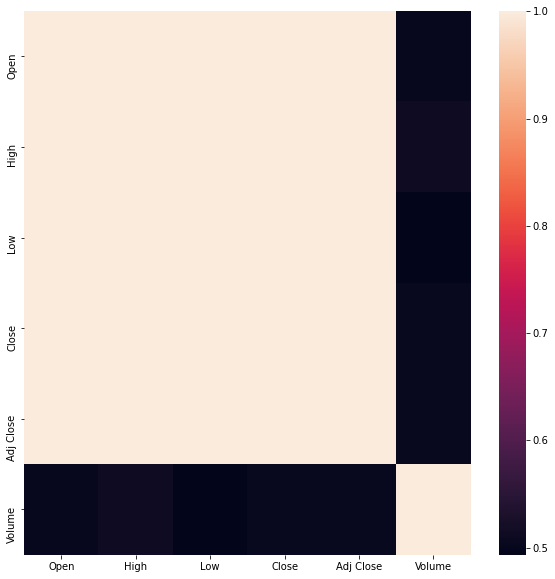

In [21]:
fig, ax = plt.subplots (figsize = (10, 10))
corr_matrix = Data.corr()
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)

In [22]:
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.50
High,1.00,1.00,1.00,1.00,1.00,0.51
Low,1.00,1.00,1.00,1.00,1.00,0.49
Close,1.00,1.00,1.00,1.00,1.00,0.51
Adj Close,1.00,1.00,1.00,1.00,1.00,0.51
Volume,0.50,0.51,0.49,0.51,0.51,1.00


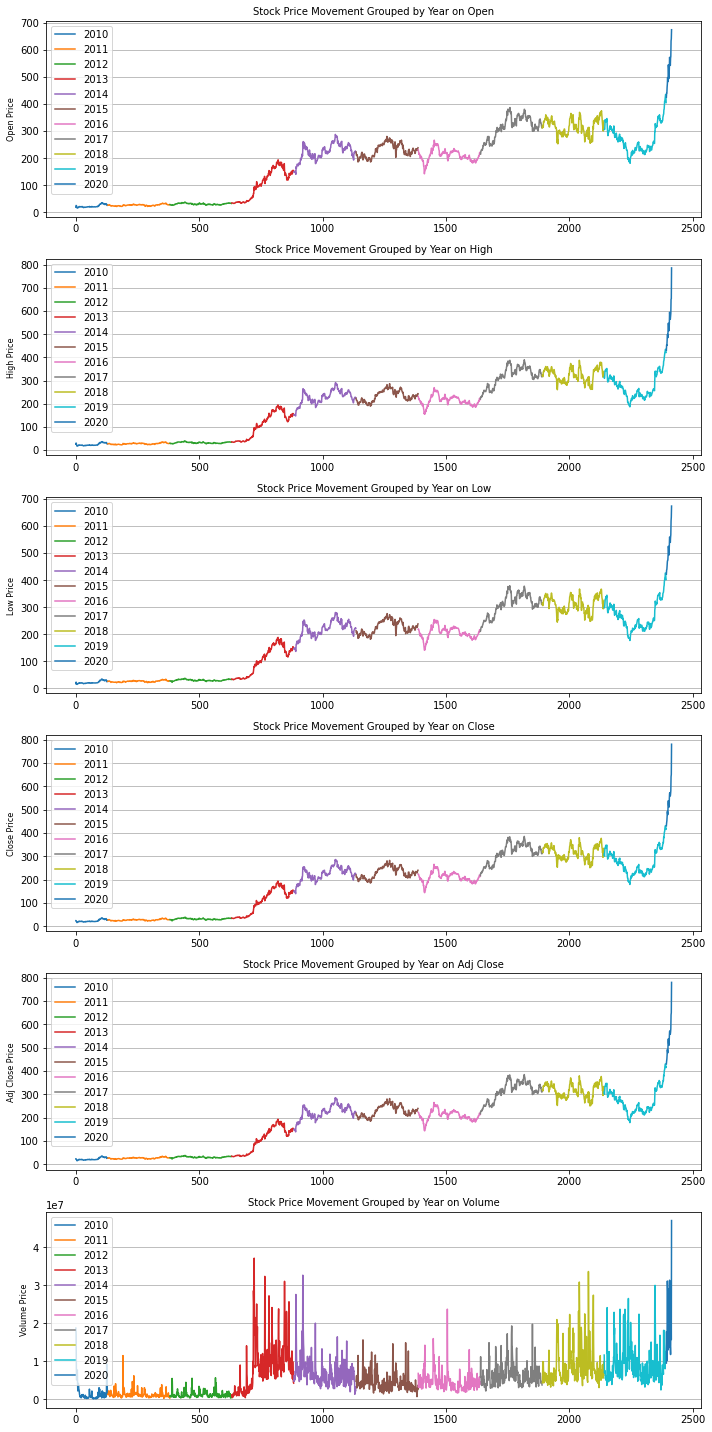

In [23]:
Data['Year'] = Data['Date'].dt.year
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    Data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

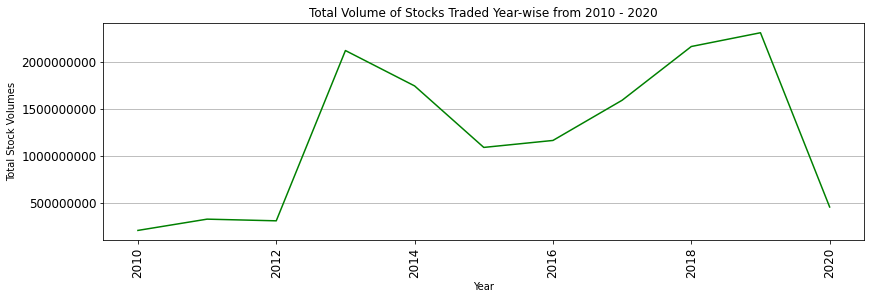

In [24]:
# Visualzing only the total volume of stocks traded grouped year-wise
check = Data.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise from 2010 - 2020", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

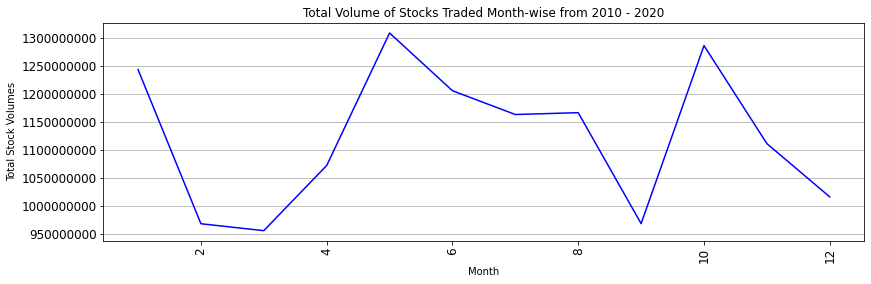

In [25]:
# Visualzing only the total volume of stocks traded grouped month-wise
check = Data.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise from 2010 - 2020", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)


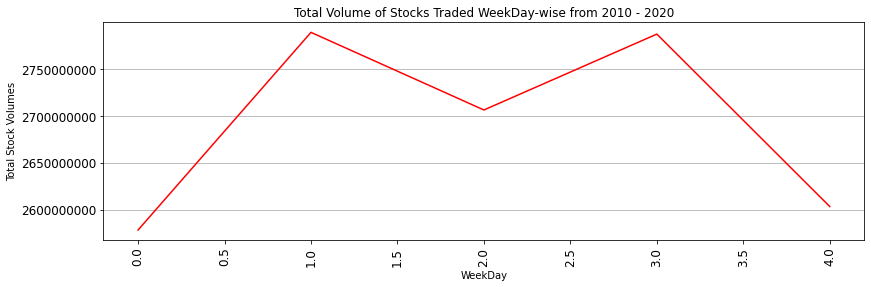

In [26]:
# Visualzing only the total volume of stocks traded grouped weekday-wise
check = Data.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded WeekDay-wise from 2010 - 2020", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

EDA (Exploratory Data Analysis) yielded insights:

1) It is found that the stock volume trade spiked from **50** to around **200** from 2013 (Both Opening, Closing and Total Volumes).

2) When viewed by Year, the spike **increased from 2012** through to 2020 thereby undergoing a **dip in 2016**.

3) When viewed monthwise, **January, June, July, August and September** showed extensive dip in stock trades whereas the other months showed substantial increase in trade.


Text(0.5, 1.0, 'Tesla Autocorrelation plot')

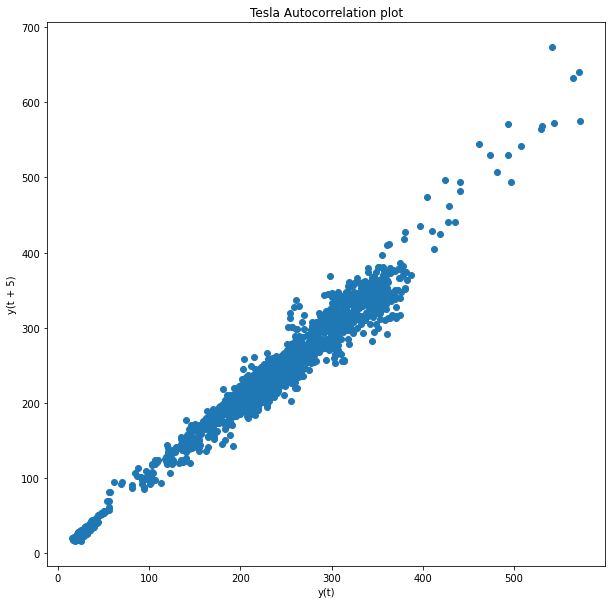

In [29]:
df = pd.read_csv("TSLA.csv").fillna(0)
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

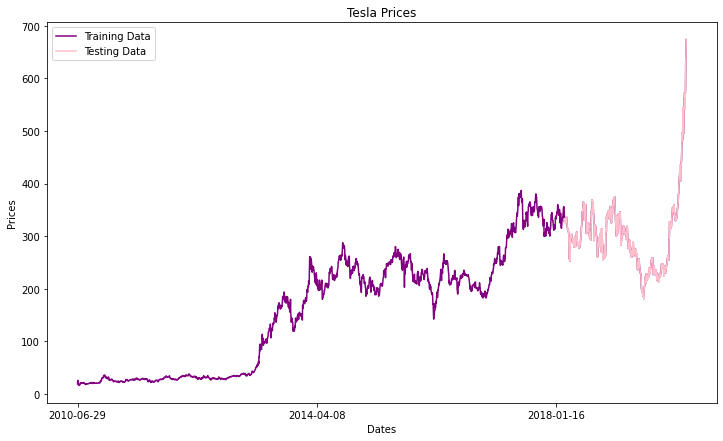

In [35]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'purple', label='Training Data')
plt.plot(test_data['Open'], 'pink', label='Testing Data')
plt.xticks(np.arange(0,1982, 950), df['Date'][0:1982:950])
plt.legend()

In [36]:
# SMAPE function (Symmetric mean absolute percentage error) as it is not currently supported in Scikit-learn as a loss function.
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))